**Loan Data Set Analysis Using Pandas**

Import Libraries and CSV File

In [41]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset and View
df= pd.read_csv('loan.csv')
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0.0,Graduate,No,572000,0,220000,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,307600,150000,252000,360.0,1.0,Urban
2,Male,Yes,2.0,Graduate,No,500000,180000,416000,360.0,1.0,Urban
3,Male,Yes,2.0,Graduate,No,234000,254600,200000,360.0,NaN,Urban
4,Male,No,0.0,Not Graduate,No,327600,0,156000,360.0,1.0,Urban


Dataset Preprocessing

In [42]:
# View data types for each column
df.dtypes

Gender                 object
Married                object
Dependents            float64
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income      int64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
dtype: object

In [43]:
# Change all NaN values in Credit History to 0
# 1.0 represents a Credit History meeting a specificed criteria
# 0.0 represents a Credit History as not meeting a specified criteria or no Credit History
df['Credit_History'].fillna(0, inplace = True)
df['Credit_History']

0      1.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
362    1.0
363    1.0
364    0.0
365    1.0
366    1.0
Name: Credit_History, Length: 367, dtype: float64

In [44]:
# Change column names 
df.rename(columns = {'Self_Employed':'Self Employed', 'Applicant_Income':'Applicant Income', 'Coapplicant_Income':'Coapplicant Income', 'Loan_Amount':'Loan Amount', 'Credit_History':'Credit History'} , inplace = True)
df.head(5)

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Term,Credit History,Area
0,Male,Yes,0.0,Graduate,No,572000,0,220000,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,307600,150000,252000,360.0,1.0,Urban
2,Male,Yes,2.0,Graduate,No,500000,180000,416000,360.0,1.0,Urban
3,Male,Yes,2.0,Graduate,No,234000,254600,200000,360.0,0.0,Urban
4,Male,No,0.0,Not Graduate,No,327600,0,156000,360.0,1.0,Urban


In [45]:
# Create column to represent the entire Household Income
df['Household Income'] = 0
df['Household Income'] = df['Applicant Income'] + df['Coapplicant Income']
df.head(5)

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Term,Credit History,Area,Household Income
0,Male,Yes,0.0,Graduate,No,572000,0,220000,360.0,1.0,Urban,572000
1,Male,Yes,1.0,Graduate,No,307600,150000,252000,360.0,1.0,Urban,457600
2,Male,Yes,2.0,Graduate,No,500000,180000,416000,360.0,1.0,Urban,680000
3,Male,Yes,2.0,Graduate,No,234000,254600,200000,360.0,0.0,Urban,488600
4,Male,No,0.0,Not Graduate,No,327600,0,156000,360.0,1.0,Urban,327600


In [46]:
# Create Debt to Income Ratio & Risk Level column to help assess Loan Approval

#Debt to Income Ratio
# Calculate Total Monthly Debt
df['Total Yearly Debt'] = df['Loan Amount'] / (df['Term'] / 12)

# Calculate Debt to Income Ratio
df['Debt to Income Ratio'] = df['Total Yearly Debt'] / (df['Household Income'])

#Risk Level Assessment
df['Risk Level'] = 'Low'
df.loc[(df['Credit History'] < 0.5) | (df['Debt to Income Ratio'] > 0.3), 'Risk Level'] = 'High'
df.loc[(df['Credit History'] >= 0.5) & (df['Debt to Income Ratio'] <= 0.3), 'Risk Level'] = 'Medium'

In [47]:
df.dtypes

Gender                   object
Married                  object
Dependents              float64
Education                object
Self Employed            object
Applicant Income          int64
Coapplicant Income        int64
Loan Amount               int64
Term                    float64
Credit History          float64
Area                     object
Household Income          int64
Total Yearly Debt       float64
Debt to Income Ratio    float64
Risk Level               object
dtype: object

In [48]:
df.head(5)

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Term,Credit History,Area,Household Income,Total Yearly Debt,Debt to Income Ratio,Risk Level
0,Male,Yes,0.0,Graduate,No,572000,0,220000,360.0,1.0,Urban,572000,7333.333333,0.012821,Medium
1,Male,Yes,1.0,Graduate,No,307600,150000,252000,360.0,1.0,Urban,457600,8400.000000,0.018357,Medium
2,Male,Yes,2.0,Graduate,No,500000,180000,416000,360.0,1.0,Urban,680000,13866.666667,0.020392,Medium
3,Male,Yes,2.0,Graduate,No,234000,254600,200000,360.0,0.0,Urban,488600,6666.666667,0.013644,High
4,Male,No,0.0,Not Graduate,No,327600,0,156000,360.0,1.0,Urban,327600,5200.000000,0.015873,Medium


In [49]:
# Create a column to represent Loan Approval Status

# Threshold
credit_history_threshold = 0.5
dti_ratio_threshold = 0.3
# Risk Level must be Low or Medium

# Calculate Loan Approval Column
df['Approval Status'] = 'No'
df.loc[((df['Credit History'] > credit_history_threshold) | (df['Debt to Income Ratio'] > dti_ratio_threshold)) & (df['Risk Level'] != 'High'), 
'Approval Status'] = 'Yes'

# Calculate number of Loans Approved and not
loan_approved = len(df.loc[df['Approval Status'] == 'Yes'])
loan_not_approved = len(df.loc[df['Approval Status'] == 'No'])

print(f"Number of Loans Approved: {loan_approved}")
print(f"Number of Loans not Approved: {loan_not_approved}")

# Calculate percentage of Approved Loans
percentage_approved = (loan_approved/(loan_approved + loan_not_approved))*100
print(f"The percentage of loans that were approved: {percentage_approved}%")

Number of Loans Approved: 278
Number of Loans not Approved: 89
The percentage of loans that were approved: 75.74931880108991%


**Dataset Analysis**

Plotting

Output 
Education
Graduate        516994.346290
Not Graduate    357810.714286
Name: Applicant Income, dtype: float64


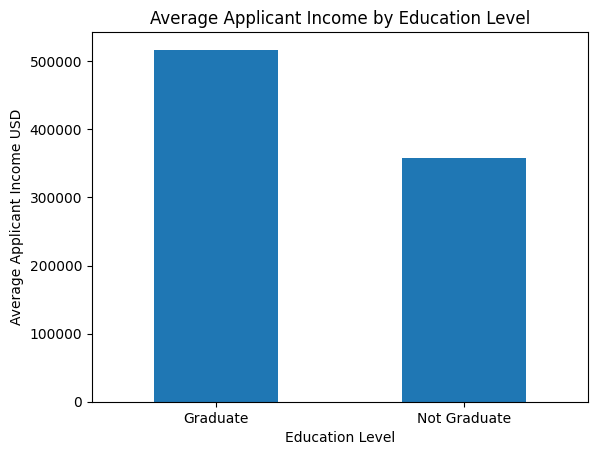

In [50]:
#1. What is the average 'Applicant Income' of individuals grouped by their 'Education' level?
avg_inc_by_ed = df.groupby('Education')['Applicant Income'].mean()
print(f"Output \n{avg_inc_by_ed}")

# Plot
avg_inc_by_ed.plot(kind = 'bar')
plt.title("Average Applicant Income by Education Level")
plt.xlabel("Education Level")
plt.xticks(rotation=0)
plt.ylabel("Average Applicant Income USD")
plt.show()

Output 
Area
Rural         82
Semiurban     84
Urban        112
dtype: int64


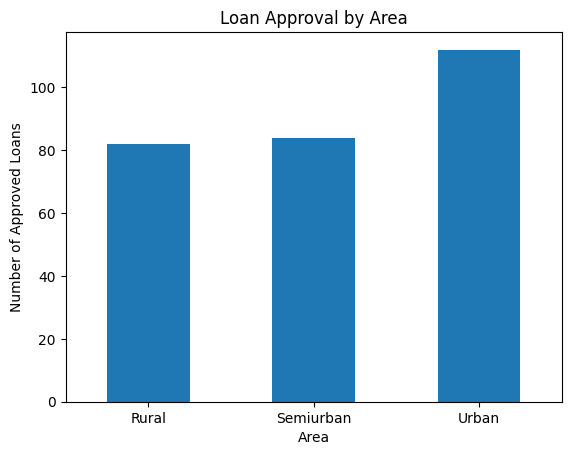

In [51]:
#2. How many individuals in each 'Area' have been approved for a loan?
loan_app_by_area = df.loc[df['Approval Status'] == 'Yes'].groupby('Area').size()
print(f"Output \n{loan_app_by_area}")

# Plot
loan_app_by_area.plot(kind = 'bar')
plt.title("Loan Approval by Area")
plt.xlabel("Area")
plt.xticks(rotation=0)
plt.ylabel("Number of Approved Loans")
plt.show()

Output 
Education
Graduate        182
Not Graduate     54
Name: Approval Status, dtype: int64


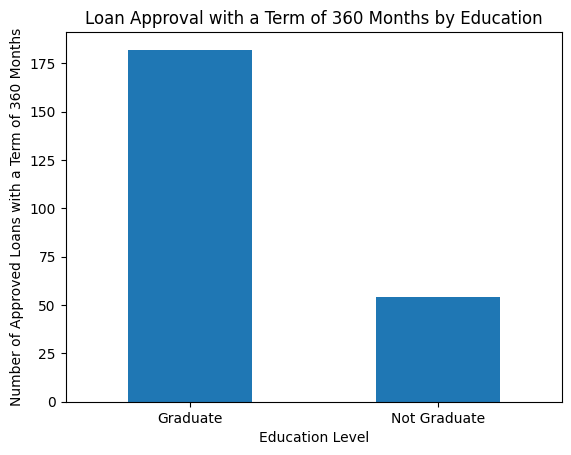

In [52]:




#3. How many individuals in each 'Education' level have been approved for a loan and have a 'Term' of 360?
app_loans_term_360_by_ed = df.loc[(df['Approval Status'] == 'Yes') & (df['Term'] == 360.0)].groupby('Education')['Approval Status'].count()
print(f"Output \n{app_loans_term_360_by_ed}")

# Plot
app_loans_term_360_by_ed.plot(kind = 'bar')
plt.title("Loan Approval with a Term of 360 Months by Education")
plt.xlabel("Education Level")
plt.xticks(rotation=0)
plt.ylabel("Number of Approved Loans with a Term of 360 Months")
plt.show()

Output 
Area
Rural        2400000
Semiurban    3200000
Urban        7252900
Name: Household Income, dtype: int64


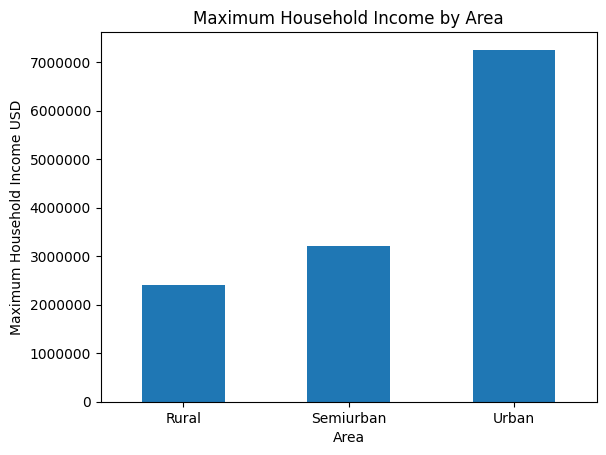

In [53]:
#4. What is the maximum 'Household Income' in each 'Area'?
household_inc_by_area = df.groupby('Area')['Household Income'].max()
print(f"Output \n{household_inc_by_area}")

# Plot
household_inc_by_area.plot(kind = 'bar')
plt.title("Maximum Household Income by Area")
plt.xlabel("Area")
plt.xticks(rotation=0)
plt.ylabel("Maximum Household Income USD")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Output: Area
Rural        22
Semiurban    20
Urban        27
dtype: int64


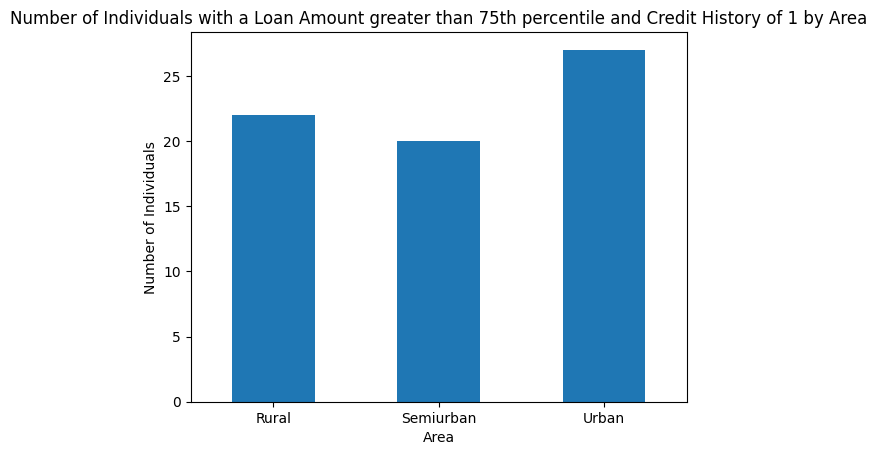

In [54]:
#5.  How many individuals in each 'Area' have a 'Loan Amount' greater than the 75th percentile of 'Loan Amount' and a 'Credit History' of 1.0?

# Calculate Percentiles
loan_75 = df['Loan Amount'].quantile(q = 0.75)

# Filter
num_ind = df.loc[(df['Loan Amount'] > loan_75) & (df['Credit History'] == 1.0)].groupby('Area').size()
print(f"Output: {num_ind}")

# Plot
num_ind.plot(kind = 'bar')
plt.title("Number of Individuals with a Loan Amount greater than 75th percentile and Credit History of 1 by Area")
plt.xlabel("Area")
plt.xticks(rotation=0)
plt.ylabel("Number of Individuals")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Output: 
Term
12.0     0.477502
180.0    0.021823
240.0    0.015223
300.0    0.039199
360.0    0.025804
480.0    0.006203
Name: Debt to Income Ratio, dtype: float64


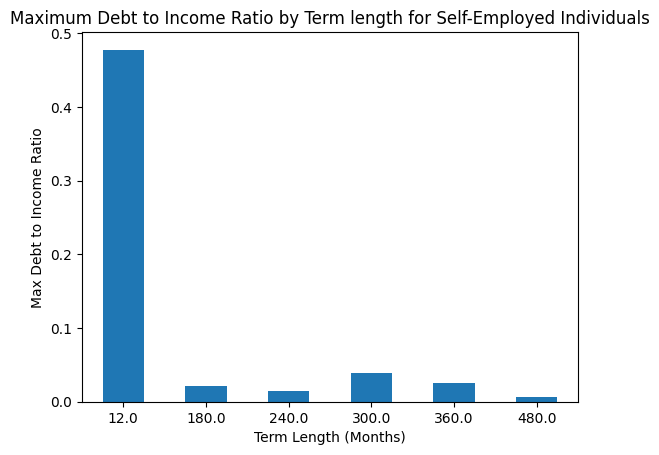

In [55]:
#6. Among self-employed applicants, what is the maximum 'Debt to Income Ratio' for each term length?
self_emp_dti_by_term = df.loc[df['Self Employed'] == 'Yes'].groupby('Term')['Debt to Income Ratio'].max()
print(f"Output: \n{self_emp_dti_by_term}")

# Plot
self_emp_dti_by_term.plot(kind = 'bar')
plt.title("Maximum Debt to Income Ratio by Term length for Self-Employed Individuals")
plt.xlabel("Term Length (Months)")
plt.xticks(rotation=0)
plt.ylabel("Max Debt to Income Ratio")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Filtering

In [56]:
#7. How many individuals have a 'Dependents' count of 0 and a 'Loan Amount' less than 500000?
num_ind = len(df.loc[(df['Dependents'] == 0) & (df['Loan Amount'] < 500000)])
print(f"Output: {num_ind} Individuals")

Output: 194 Individuals


In [57]:
#8. What is the average 'Coapplicant Income' for individuals who are not self-employed and have a 'Credit History' of 1.0?
avg_coapp_inc = df.loc[(df['Self Employed'] == 'No') & (df['Credit History'] == 1.0)]['Coapplicant Income'].mean()
print(f"Output: ${avg_coapp_inc}")

Output: $142303.43347639486


In [58]:
#9. What is the median 'Household Income' for individuals with 'Dependents' greater than 0 and a 'Term' of 360?
med_household_inc = df.loc[(df['Dependents'] > 0) & (df['Term'] == 360.0)]['Household Income'].median()
print(f"Output: ${med_household_inc}")

Output: $570500.0


In [59]:
#10. What is the maximum 'Loan Amount' for individuals who are not self-employed and have a 'Credit History' of 1.0?
max_loan_amount = df.loc[(df['Self Employed'] == 'No') & (df['Credit History'] == 1.0)]['Loan Amount'].max()
print(f"Output: ${max_loan_amount}")

Output: $920000


In [60]:
#11. What is the average 'Household Income' for individuals who have a 'Loan Amount' greater than the median 'Loan Amount' in the dataset?

#Median Loan Amount
median_loan = df['Loan Amount'].median()
#Filter
avg_household_inc_above_median = df.loc[df['Loan Amount'] > median_loan]['Household Income'].mean()
print(f"Output: ${avg_household_inc_above_median}")

Output: $777361.4525139665


In [61]:
#12. How many individuals have an 'Applicant Income' greater than the mean 'Applicant Income' and a 'Loan Amount' less than the median 'Loan Amount'?

# Calculate Mean and Median Values
app_mean = df['Applicant Income'].mean()
loan_med = df['Loan Amount'].median()

#Filter
num_ind = len(df.loc[(df['Applicant Income'] > app_mean) & (df['Loan Amount'] < loan_med)])
print(f"Output: {num_ind} Individuals")

Output: 28 Individuals


In [62]:
#13. What is the median 'Household Income' for individuals with 'Dependents' greater than or equal to 2 and a 'Term' of 360?
med_household_inc = df.loc[(df['Dependents'] >= 2) & (df['Term'] == 360.0)]['Household Income'].median()
print(f"Output: ${med_household_inc}")

Output: $561300.0


In [63]:
#14. What is the median 'Debt to Income Ratio' ratio for individuals who are not self-employed and have a 'Credit History' of 1.0?
med_dti = df.loc[(df['Self Employed'] == 'No') & (df['Credit History'] == 1.0)]['Debt to Income Ratio'].median()
print(f"Output: {med_dti}")

Output: 0.016909347111319868


In [64]:
#15. What is the maximum household income among married applicants with more than one dependent?
max_household_inc = df.loc[(df['Married'] == 'Yes') & (df['Dependents'] > 1)]['Household Income'].max()
print(f"Output: ${max_household_inc}")

Output: $7252900


In [65]:
#16. How many applicants in semiurban areas, who are married and have no dependents, have been approved for a loan with a term less than 240 days?
num_app = len(df.loc[(df['Area'] == 'Semiurban') & (df['Married'] == 'Yes') & (df['Dependents'] == 0) & (df['Approval Status'] == 'Yes')
              & (df['Term'] < 240)])
print(f"Output: {num_app} Applicants")

Output: 3 Applicants


In [66]:
#17. Among self-employed applicants, what is the median household income for each combination of gender and education level?
med_household_inc = df.loc[df['Self Employed'] == 'Yes'].groupby(['Gender', 'Education'])['Household Income'].median()
print(f"Output: \n{med_household_inc}")

Output: 
Gender  Education   
Female  Graduate        621650.0
Male    Graduate        691050.0
        Not Graduate    558700.0
Name: Household Income, dtype: float64


In [67]:
#18. What is the maximum coapplicant income for each combination of gender and education level, among applicants with a credit history of 1.0 
#    and household income greater than 500,000?
max_coapp_inc = df.loc[(df['Credit History'] == 1.0) & (df['Household Income'] > 500000)].groupby(['Gender', 'Education'])['Coapplicant Income'].max()
print(f"Output: \n{max_coapp_inc}")

Output: 
Gender  Education   
Female  Graduate        1166600
        Not Graduate     357500
Male    Graduate        1450700
        Not Graduate    1398300
Name: Coapplicant Income, dtype: int64


Filtering by Percentile

In [68]:
#19. How many individuals have an 'Applicant Income' greater than the 75th percentile of 'Applicant Income' and a 'Coapplicant Income' 
#    greater than the 90th percentile of 'Coapplicant Income'?

# Calculate Percentiles
app_75 = df['Applicant Income'].quantile(q = 0.75)
coapp_90 = df['Coapplicant Income'].quantile(q = 0.9)

#Filter
num_ind = len(df.loc[(df['Applicant Income'] > app_75) & (df['Coapplicant Income'] > coapp_90)])
print(f"Output: {num_ind} Individuals")

Output: 10 Individuals


In [69]:
#20. How many individuals have a 'Loan Amount' greater than the 90th percentile of 'Loan Amount' and a 'Term' of 360, 
#    and are self-employed?

# Calculate Percentile
loan_90 = df['Loan Amount'].quantile(q = 0.9)

# Filter and Count
num_ind = len(df.loc[(df['Loan Amount'] > loan_90) & (df['Term'] == 360.0) & (df['Self Employed'] == 'Yes')])
print(f"Output: {num_ind} Individuals")

Output: 6 Individuals


In [70]:
#21. How many individuals in each 'Area' have a 'Term' less than the 25th percentile of 'Debt to Income Ratio' 
#    and an 'Approval Status' of 'Yes'?
dti_25 = df['Debt to Income Ratio'].quantile(q = 0.25)

df.loc[(df['Debt to Income Ratio'] < dti_25) & (df['Approval Status'] == 'Yes')].groupby('Area').size()

Area
Rural        21
Semiurban    18
Urban        25
dtype: int64

Grouping and Sorting

In [71]:
#22. What is the average 'Loan Amount' for individuals who are self-employed and have a 'Credit History' of 1.0, grouped by their 'Education' level?
avg_loan_amount = df.loc[(df['Self Employed'] == 'Yes') & (df['Credit History'] == 1.0)].groupby('Education')['Loan Amount'].mean()
print(f"Output: ${avg_loan_amount}")

Output: $Education
Graduate        283846.153846
Not Graduate    228857.142857
Name: Loan Amount, dtype: float64


In [72]:
#23. Can you provide the top 3 records with the highest 'Debt to Income Ratio' , sorted in descending order?
dti_sorted = df.sort_values('Debt to Income Ratio', ascending = False)
dti_top_3 = dti_sorted.head(3)
print(dti_top_3)

    Gender Married  Dependents     Education Self Employed  Applicant Income   
325   Male      No         0.0      Graduate            No            287500  \
144   Male     Yes         2.0      Graduate           Yes           1089000   
216   Male     Yes         0.0  Not Graduate            No            274700   

     Coapplicant Income  Loan Amount  Term  Credit History       Area   
325              241600       190000   6.0             0.0  Semiurban  \
144                   0       520000  12.0             1.0      Rural   
216              245800       236000  36.0             1.0  Semiurban   

     Household Income  Total Yearly Debt  Debt to Income Ratio Risk Level   
325            529100      380000.000000              0.718201       High  \
144           1089000      520000.000000              0.477502       High   
216            520500       78666.666667              0.151137     Medium   

    Approval Status  
325              No  
144              No  
216        

In [73]:
#24. What is the median household income for each area, sorted in descending order?
med_household_inc_by_area = df.groupby('Area')['Household Income'].median().sort_values(ascending = False)
print(f"Output: \n{med_household_inc_by_area}")

Output: 
Area
Rural        547400.0
Urban        529850.0
Semiurban    487550.0
Name: Household Income, dtype: float64


In [74]:
#25. What is the median coapplicant income for each combination of gender, education level, and credit history category, sorted in 
#    descending order of median coapplicant income?
med_coapp_inc = df.groupby(['Gender', 'Education', 'Credit History'])['Coapplicant Income'].median().sort_values(ascending = False)
print(f"Output: \n{med_coapp_inc}")

Output: 
Gender  Education     Credit History
Female  Graduate      0.0               200000.0
        Not Graduate  0.0               170000.0
Male    Graduate      0.0               140850.0
        Not Graduate  1.0               135000.0
        Graduate      1.0               134050.0
        Not Graduate  0.0                52800.0
Female  Graduate      1.0                    0.0
        Not Graduate  1.0                    0.0
Name: Coapplicant Income, dtype: float64


In [75]:
#26. What is the average loan amount for each combination of gender, education level, and self-employed status?
avg_loan_amount = df.groupby(['Gender', 'Education', 'Self Employed'])['Loan Amount'].mean()
print(f"Output: \n{avg_loan_amount}")

Output: 
Gender  Education     Self Employed
Female  Graduate      No               248448.979592
                      Yes              342000.000000
        Not Graduate  No               229000.000000
Male    Graduate      No               280340.659341
                      Yes              311250.000000
        Not Graduate  No               228867.924528
                      Yes              266285.714286
Name: Loan Amount, dtype: float64


In [76]:
#27. Among individuals with 'Self Employed' status, what is the median 'Total Yearly Debt' for each 'Risk Level', 
#    grouped by 'Education'?
self_emp_ind = df.loc[df['Self Employed'] == 'Yes'].groupby(['Risk Level', 'Education'])['Total Yearly Debt'].median()
print(f"Output: \n{self_emp_ind}")

Output: 
Risk Level  Education   
High        Graduate        24566.666667
            Not Graduate    13266.666667
Medium      Graduate        10000.000000
            Not Graduate     7533.333333
Name: Total Yearly Debt, dtype: float64


In [77]:
#28. What is the average debt-to-income ratio for individuals grouped by their 'Education' level?
dti_by_ed = df.groupby('Education')['Debt to Income Ratio'].mean()
print(f"Output: \n{dti_by_ed}")

Output: 
Education
Graduate        0.021600
Not Graduate    0.020416
Name: Debt to Income Ratio, dtype: float64


In [78]:
#29. How many individuals with a debt-to-income ratio above 0.05 have been approved for a loan 
#    ('Approval Status' = 'Yes'), grouped by their 'Gender'?
num_ind = df.loc[(df['Debt to Income Ratio'] > 0.05) & (df['Approval Status'] == 'Yes')].groupby('Gender').size()
print(f"Output: \n{num_ind}")

Output: 
Gender
Female    2
Male      4
dtype: int64


In [79]:
#30. Among individuals with 'Self Employed' status, what is the median debt-to-income ratio for each 
#   'Dependents' category?
med_dti = df.loc[df['Self Employed'] == 'Yes'].groupby('Dependents')['Debt to Income Ratio'].median()
print(f"Output: \n{med_dti}")

Output: 
Dependents
0.0    0.015150
1.0    0.015223
2.0    0.016800
3.0    0.013020
4.0    0.015111
Name: Debt to Income Ratio, dtype: float64
